In [45]:
import pandas as pd
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#file_path = 'spotify_10_songs.csv'
df_songs = pd.read_csv('spotify_5000_songs.csv')#, index_col='artist')

#print(df_songs.columns)

df_songs.drop(columns=['Unnamed: 0'], inplace=True)
df_songs.head()
df_songs.columns = df_songs.columns.str.strip()
df_songs['name'] = df_songs['name'].str.rstrip(' .')
df_songs['name'] = df_songs['name'].str.split().str[:2].str.join(' ') #shorten the song's name

df_songs.set_index('name', inplace=True)
to_drop = ['artist', 'html', 'id', 'time_signature', 'duration_ms', 'mode','key', 'type']
df_songs = df_songs.drop(columns=to_drop)
df_songs.head(10)

danceability  energy  loudness  speechiness  acousticness  \
name                                                                      
Se Eu                0.658  0.2590   -13.141       0.0705         0.694   
Saudade De           0.742  0.3990   -12.646       0.0346         0.217   
Canta Canta,         0.851  0.7300   -11.048       0.3470         0.453   
Mulher Eu            0.705  0.0502   -18.115       0.0471         0.879   
Rosa Morena          0.651  0.1190   -19.807       0.0380         0.916   
Desafinado           0.466  0.1460   -17.500       0.0649         0.931   
Madalena             0.675  0.2070   -13.820       0.0545         0.963   
O Meu                0.504  0.7330   -10.720       0.3890         0.696   
Brigas Nunca         0.694  0.5460   -11.452       0.0400         0.398   
Previsao             0.674  0.8640    -7.971       0.0382         0.641   

              instrumentalness  liveness  valence    tempo  
name                                                        
Se Eu                 0.000059     0.975    0.306  110.376  
Saudade De            0.000002     0.107    0.693  125.039  
Canta Canta,          0.000063     0.124    0.905   93.698  
Mulher Eu             0.000041     0.386    0.524  106.802  
Rosa Morena           0.000343     0.104    0.402  120.941  
Desafinado            0.154000     0.107    0.423  142.885  
Madalena              0.414000     0.112    0.684   93.531  
O Meu                 0.000056     0.673    0.886   96.565  
Brigas Nunca          0.076000     0.153    0.641  170.032  
Previsao              0.358000     0.139    0.536   99.995

In [2]:
# Calculate the Euclidean distances between all pairs of students in the foods_df DataFrame
distances_array = pairwise_distances(df_songs, metric='euclidean')

# Create a Pandas DataFrame from the distances_array
songs_not_scaled_distances = pd.DataFrame(distances_array,
                                      index=df_songs.index,
                                      columns=df_songs.index,)

# Display the Euclidean distances DataFrame
songs_not_scaled_distances

name                  Se Eu  Saudade De  Canta Canta,  Mulher Eu  Rosa Morena  \
name                                                                            
Se Eu              0.000000   14.710787     16.852684   6.163536    12.525679   
Saudade De        14.710787    0.000000     31.386810  19.056914     8.290567   
Canta Canta,      16.852684   31.386810      0.000000  14.920656    28.633507   
Mulher Eu          6.163536   19.056914     14.920656   0.000000    14.243514   
Rosa Morena       12.525679    8.290567     28.633507  14.243514     0.000000   
...                     ...         ...           ...        ...          ...   
1812 Festival     24.730575   38.679312     13.720514  19.645670    33.241204   
Winter Fragments  28.630780   42.925338     15.192355  23.980983    37.870473   
Schoenberg: 5     48.960148   61.481930     38.871899  43.127774    54.540385   
Serenade For      46.251701   60.329417     32.366929  41.288408    54.693584   
Ravel: Boléro,    47.655581   62.083101     32.546159  43.172272    57.023614   

name              Desafinado   Madalena      O Meu  Brigas Nunca   Previsao  \
name                                                                          
Se Eu              32.813604  16.892296  14.049285     59.687997  11.650928   
Saudade De         18.514550  31.542069  28.554492     45.009588  25.487488   
Canta Canta,       49.618977   2.929567   2.968209     76.336589   7.040215   
Mulher Eu          36.090749  13.959624  12.663041     63.584429  12.253376   
Rosa Morena        22.066294  28.060894  26.036343     49.802109  24.074968   
...                      ...        ...        ...           ...        ...   
1812 Festival      55.298297  11.133029  15.418709     82.998065  19.625795   
Winter Fragments   59.913406  13.176916  17.512673     87.527245  21.878827   
Schoenberg: 5      75.726912  36.501887  40.827566    103.387825  45.097866   
Serenade For       76.713900  30.707230  34.932242    104.490048  39.291829   
Ravel: Boléro,     79.082842  31.319445  35.296698    106.725004  39.539605   

name              ...  Symphony No.   Pines Of  Don Giovanni,  Music for  \
name              ...                                                      
Se Eu             ...     20.001199  23.226061      18.860526  33.406753   
Saudade De        ...     34.400927  34.745831       4.658152  20.109879   
Canta Canta,      ...      8.162558  20.073864      35.640346  50.046717   
Mulher Eu         ...     15.644524  17.119971      22.662294  35.836997   
Rosa Morena       ...     29.777937  27.753500       9.831820  21.605565   
...               ...           ...        ...            ...        ...   
1812 Festival     ...      5.768619  10.764330      42.196380  54.404806   
Winter Fragments  ...      8.669764  15.397099      46.608265  59.184504   
Schoenberg: 5     ...     31.210421  26.811686      64.239217  73.533070   
Serenade For      ...     26.373660  28.485916      63.821745  75.486907   
Ravel: Boléro,    ...     27.705833  32.081107      65.808079  78.207148   

name                A Flock  1812 Festival  Winter Fragments  Schoenberg: 5  \
name                                                                          
Se Eu             50.417926      24.730575         28.630780      48.960148   
Saudade De        64.825210      38.679312         42.925338      61.481930   
Canta Canta,      35.323778      13.720514         15.192355      38.871899   
Mulher Eu         45.895113      19.645670         23.980983      43.127774   
Rosa Morena       59.699887      33.241204         37.870473      54.540385   
...                     ...            ...               ...            ...   
1812 Festival     26.469197       0.000000          5.016267      25.491259   
Winter Fragments  21.920114       5.016267          0.000000      24.054246   
Schoenberg: 5     20.109392      25.491259         24.054246       0.000000   
Serenade For       6.813643      21.661192         17.723552

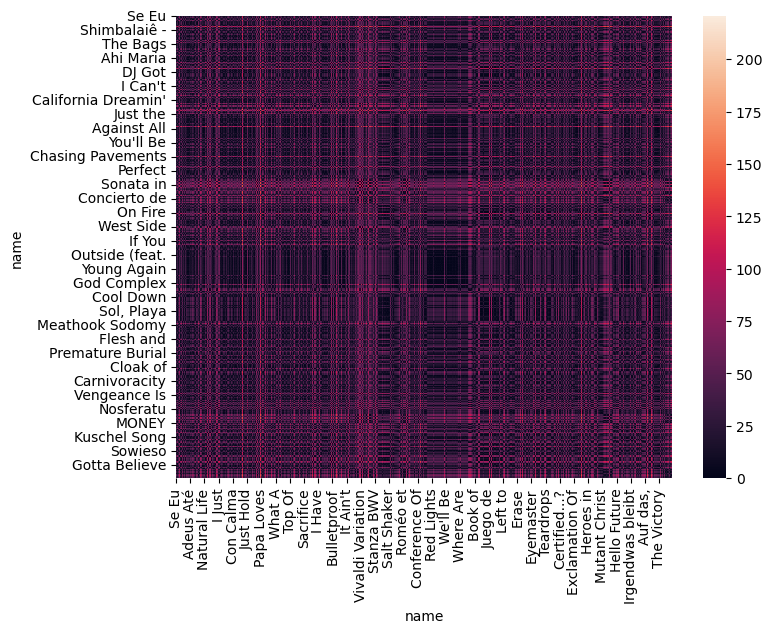

In [3]:
# Create a figure with a size of 12 inches by 8 inches
plt.subplots(figsize=(8, 6))

# Generate a heatmap of the Euclidean distances DataFrame
sns.heatmap(songs_not_scaled_distances);

In [47]:
#Min and Max Scaling

# Create a MinMaxScaler object
scaler = MinMaxScaler().set_output(transform="pandas") 
# Scale the df_songs
df_songs_scaled_minmax = scaler.fit_transform(df_songs)

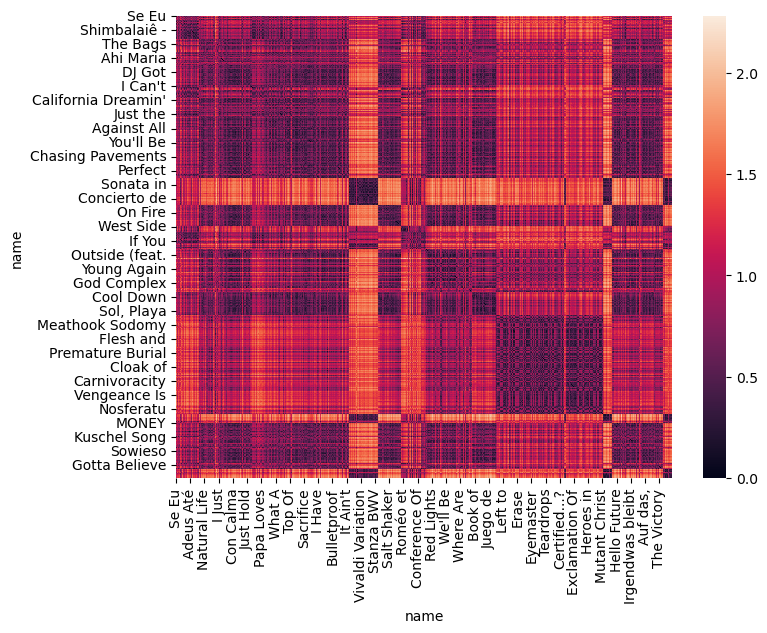

In [7]:
songs_scaled_minmax_distances = pd.DataFrame(pairwise_distances(df_songs_scaled_minmax),
                                         index=df_songs.index,
                                         columns=df_songs.index)

# Create a figure with a size of 12 inches by 8 inches
plt.subplots(figsize=(8, 6))

# Generate a heatmap of the Euclidean distances DataFrame
sns.heatmap(songs_scaled_minmax_distances);

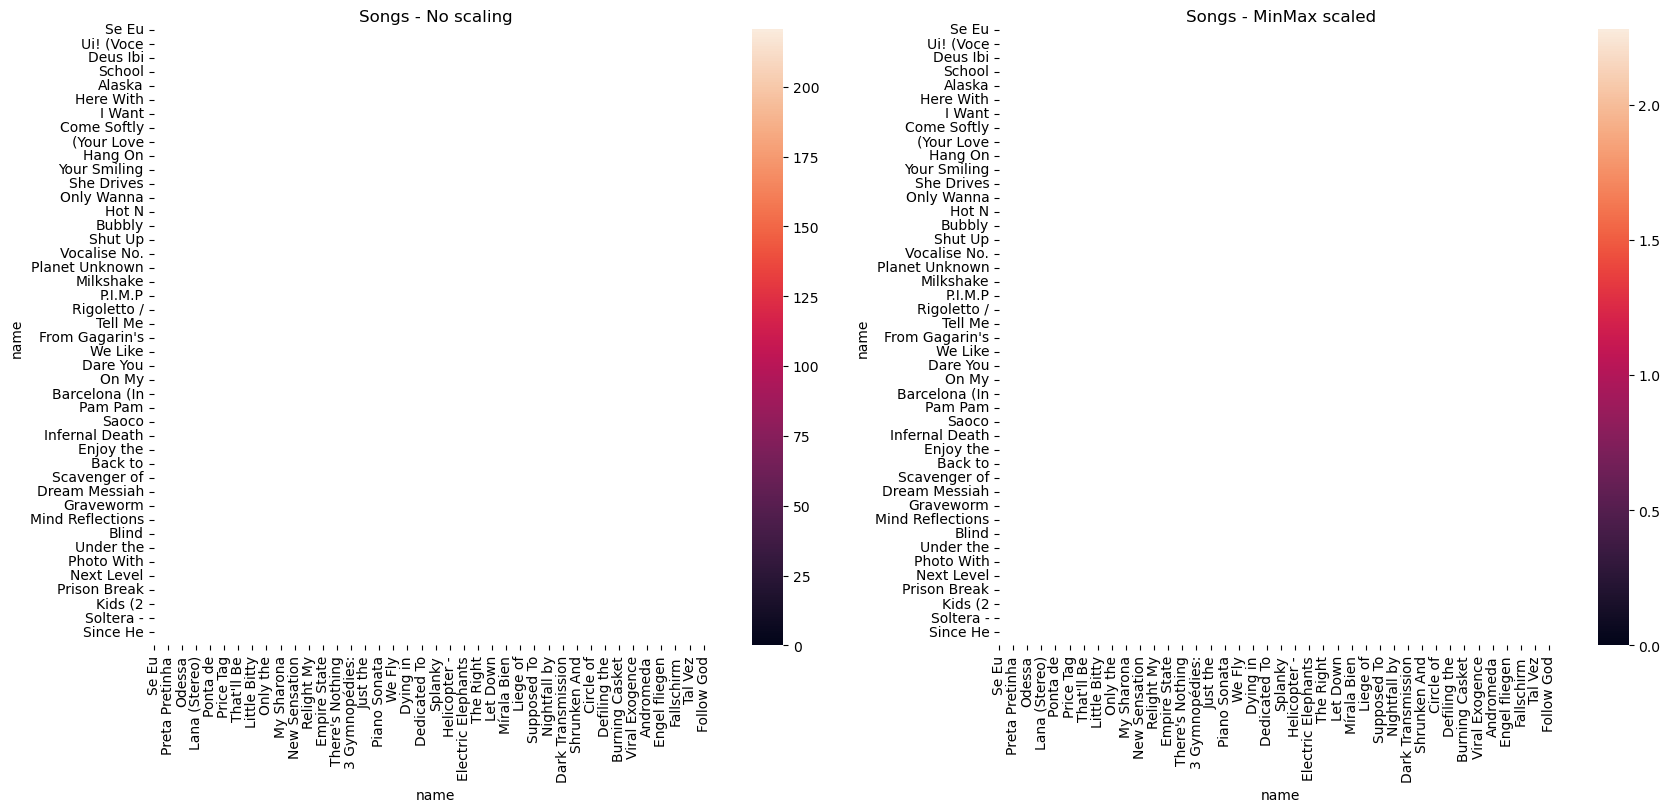

In [8]:
# Making the DataFrame for the MinMaxed heatmap
songs_scaled_minmax_distances = pd.DataFrame(pairwise_distances(df_songs_scaled_minmax),
                                         index=df_songs.index,
                                         columns=df_songs.index)

# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.heatmap(songs_not_scaled_distances, ax=ax1, linewidths=.2);
sns.heatmap(songs_scaled_minmax_distances, ax=ax2, linewidths=.2);

# Adding titles to the plots
ax1.set_title('Songs - No scaling')
ax2.set_title('Songs - MinMax scaled')

plt.show()

In [ ]:
# Standard scaler

In [9]:
# Create a StandardScaler object
scaler = StandardScaler().set_output(transform="pandas")

# Scale the df_songs DataFrame
songs_scaled_standard = scaler.fit_transform(df_songs)

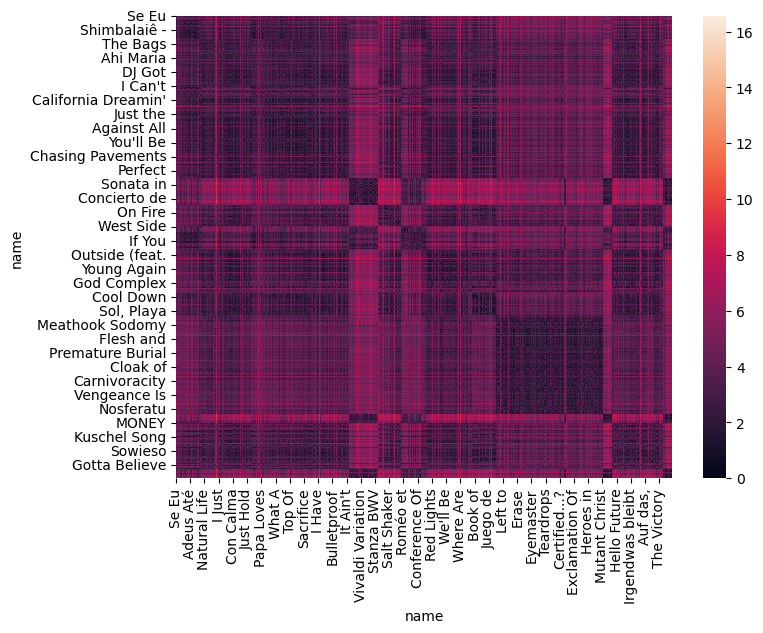

In [10]:
songs_scaled_standard_distances = pd.DataFrame(pairwise_distances(songs_scaled_standard),
                                         index=df_songs.index,
                                         columns=df_songs.index)

# Create a figure with a size of 12 inches by 8 inches
plt.subplots(figsize=(8, 6))

# Generate a heatmap of the Euclidean distances DataFrame
sns.heatmap(songs_scaled_standard_distances);

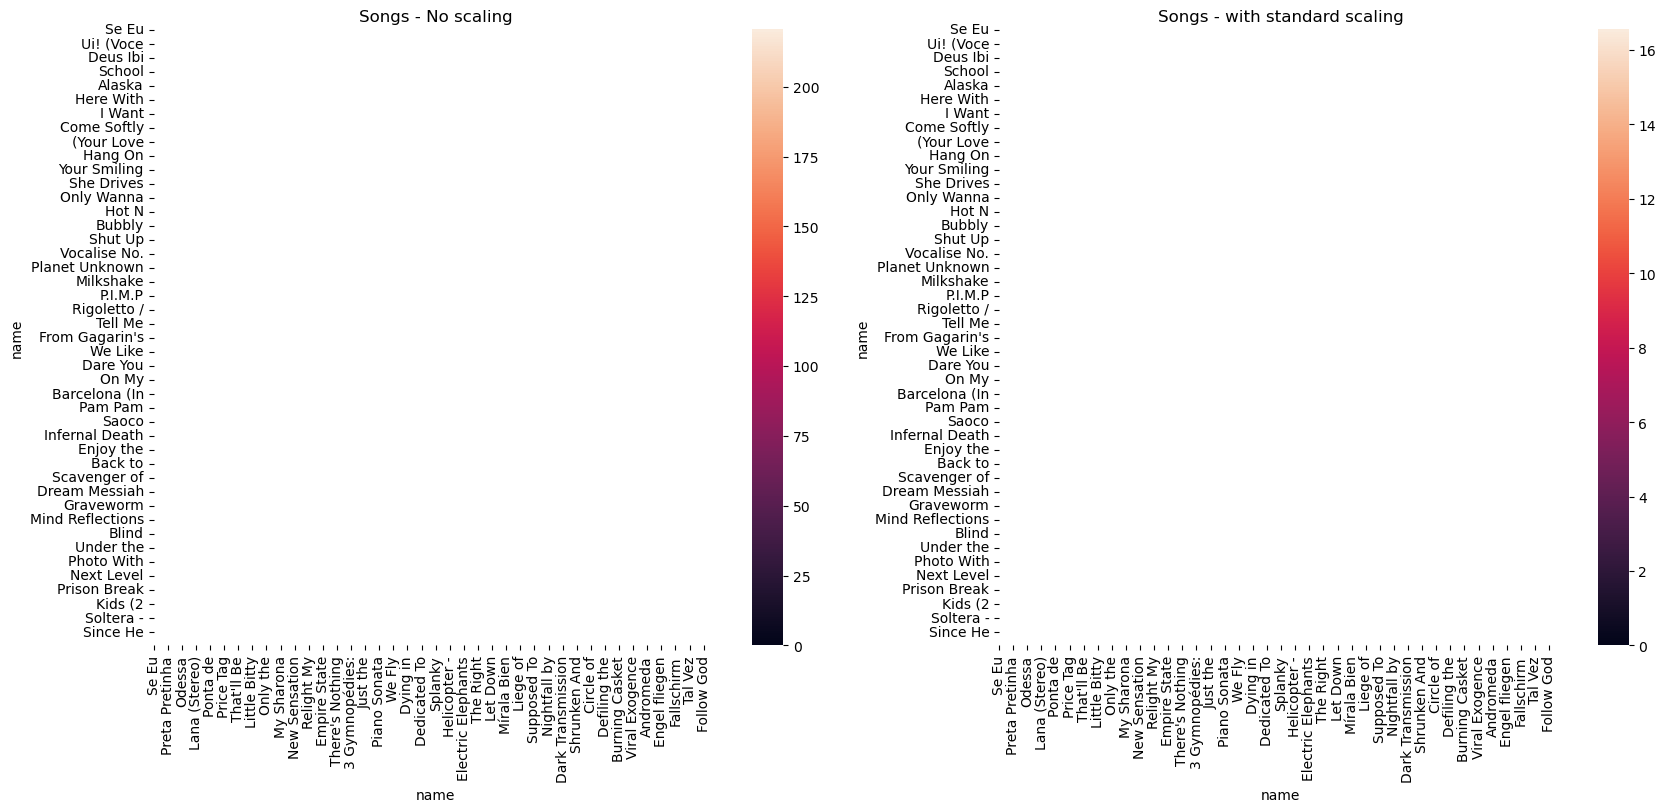

In [11]:
# Making the DataFrame for the standard heatmap
songs_scaled_standard_distances = pd.DataFrame(pairwise_distances(songs_scaled_standard),
                                         index=df_songs.index,
                                         columns=df_songs.index)

# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.heatmap(songs_not_scaled_distances, ax=ax1, linewidths=.2);
sns.heatmap(songs_scaled_standard_distances, ax=ax2, linewidths=.2);

# Adding titles to the plots
ax1.set_title('Songs - No scaling')
ax2.set_title('Songs - with standard scaling')

plt.show()

In [ ]:
# Robust scaler

In [12]:
# Create a RobustScaler object
scaler = RobustScaler().set_output(transform="pandas")

# Scale the foods_df DataFrame
songs_scaled_robust = scaler.fit_transform(df_songs)

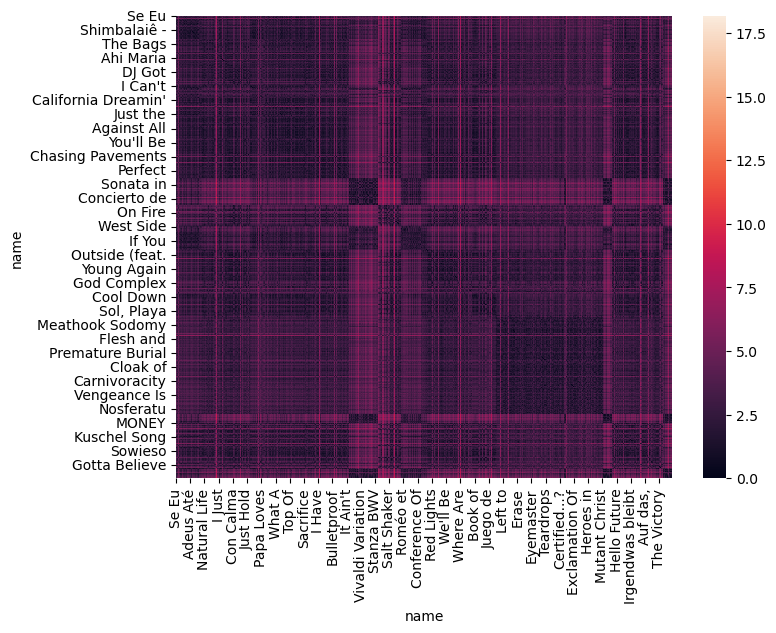

In [13]:
songs_scaled_robust_distances = pd.DataFrame(pairwise_distances(songs_scaled_robust),
                                         index=df_songs.index,
                                         columns=df_songs.index)
# Create a figure with a size of 12 inches by 8 inches
plt.subplots(figsize=(8, 6))

# Generate a heatmap of the Euclidean distances DataFrame
sns.heatmap(songs_scaled_robust_distances);

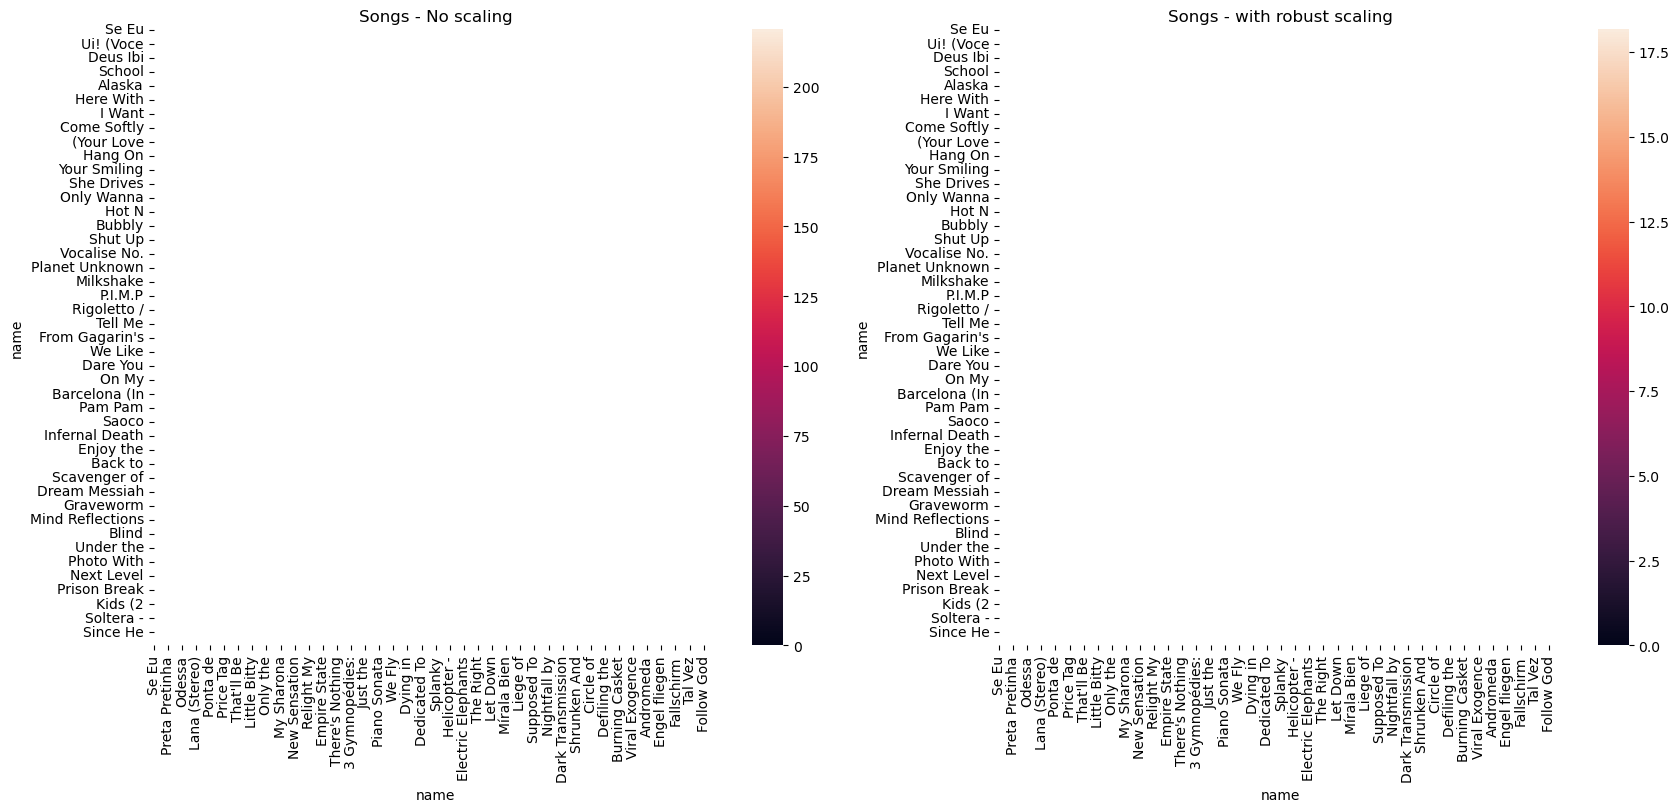

In [24]:
# Making the DataFrame for the MinMaxed heatmap
songs_scaled_robust_distances = pd.DataFrame(pairwise_distances(songs_scaled_robust),
                                         index=df_songs.index,
                                         columns=df_songs.index)

# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.heatmap(songs_not_scaled_distances, ax=ax1, linewidths=.2);
sns.heatmap(songs_scaled_robust_distances, ax=ax2, linewidths=.2);

# Adding titles to the plots
ax1.set_title('Songs - No scaling')
ax2.set_title('Songs - with robust scaling')

plt.show()

In [ ]:
# Quantile transformer

In [15]:
# Number of samples
number_of_samples = df_songs.shape[0]

# Create a QuantileTransformer object
scaler = QuantileTransformer(n_quantiles = number_of_samples).set_output(transform="pandas")

# Transform the foods_df DataFrame
songs_scaled_quantile = scaler.fit_transform(df_songs)

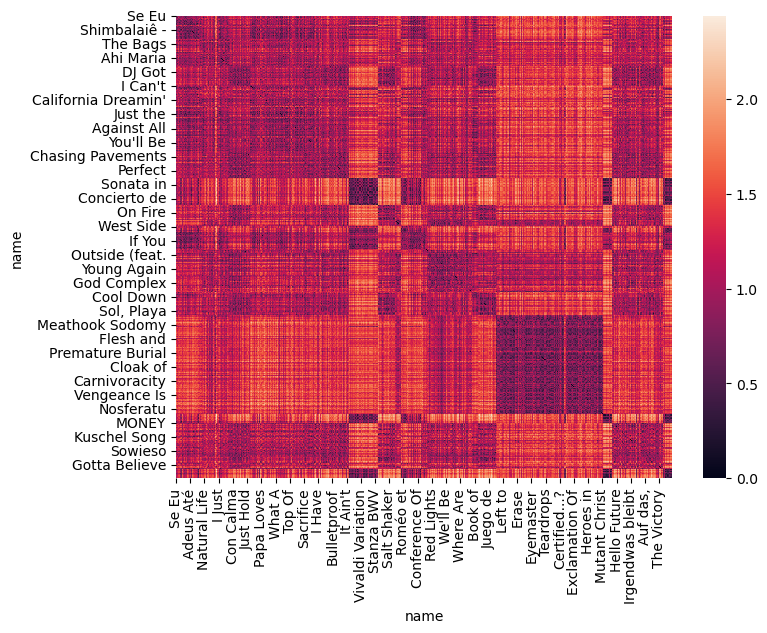

In [16]:
songs_scaled_quantile_distances = pd.DataFrame(pairwise_distances(songs_scaled_quantile),
                                           index=df_songs.index,
                                           columns=df_songs.index)
# Create a figure with a size of 12 inches by 8 inches
plt.subplots(figsize=(8, 6))

# Generate a heatmap of the Euclidean distances DataFrame
sns.heatmap(songs_scaled_quantile_distances);

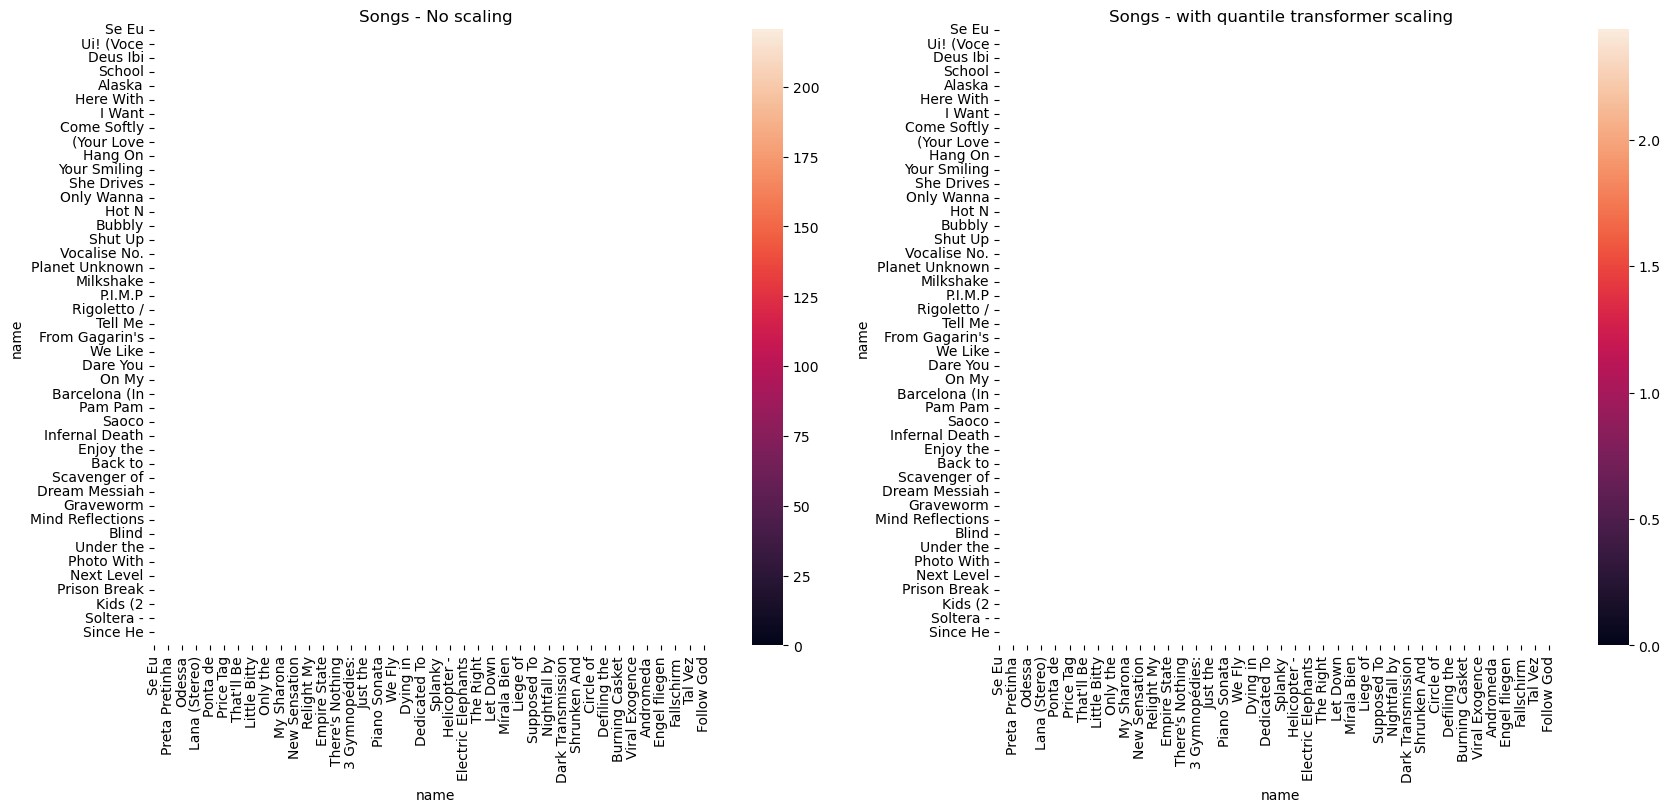

In [18]:
# Making the DataFrame for the Quantile heatmap
songs_scaled_quantile_distances = pd.DataFrame(pairwise_distances(songs_scaled_quantile),
                                           index=df_songs.index,
                                           columns=df_songs.index)

# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.heatmap(songs_not_scaled_distances, ax=ax1, linewidths=.2);
sns.heatmap(songs_scaled_quantile_distances, ax=ax2, linewidths=.2);

# Adding titles to the plots
ax1.set_title('Songs - No scaling')
ax2.set_title('Songs - with quantile transformer scaling')
plt.show()

In [ ]:
# Power transformer

In [19]:
# Create a PowerTransformer object
scaler = PowerTransformer().set_output(transform="pandas")
"""
In this notebook we use the inline version of .set_output(transform="pandas")
Instead of the universal:
  from sklearn import set_config
  set_config(transform_output = "pandas")

This is because of a known bug when using the universal version with power transformer
https://github.com/scikit-learn/scikit-learn/issues/26443
"""

# Transform the foods_df DataFrame
songs_scaled_power = scaler.fit_transform(df_songs)

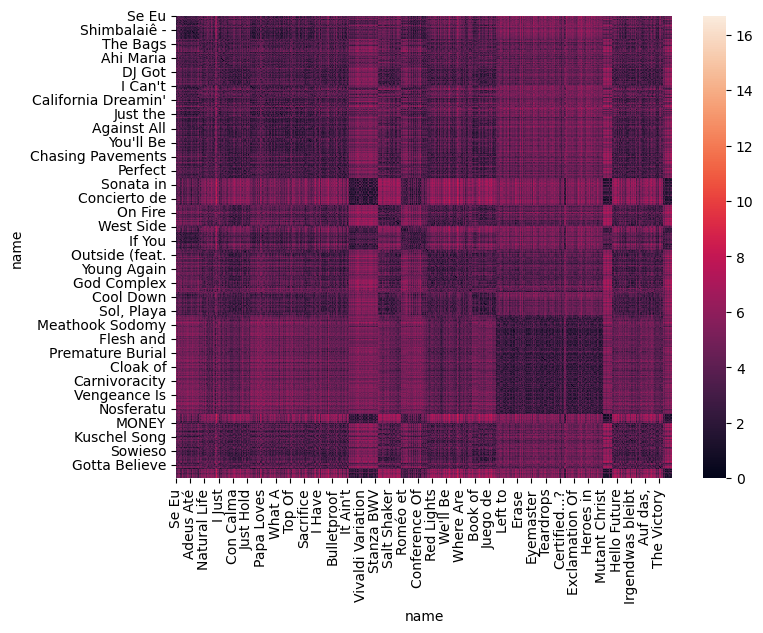

In [20]:
songs_scaled_power_distances = pd.DataFrame(pairwise_distances(songs_scaled_power),
                                           index=df_songs.index,
                                           columns=df_songs.index)
# Create a figure with a size of 12 inches by 8 inches
plt.subplots(figsize=(8, 6))

# Generate a heatmap of the Euclidean distances DataFrame
sns.heatmap(songs_scaled_power_distances);

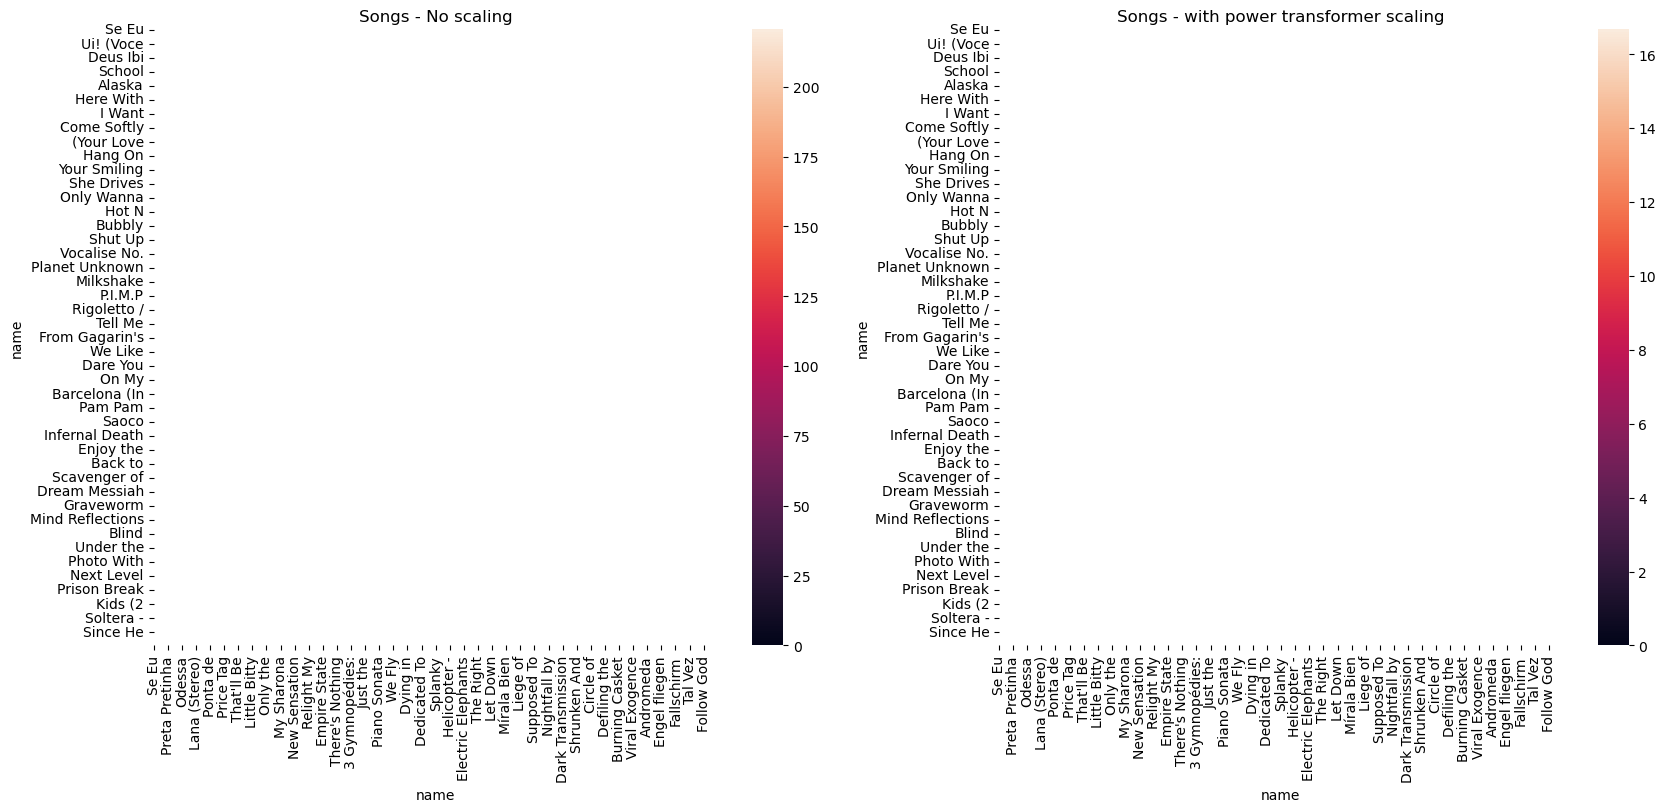

In [21]:
# Making the DataFrame for the Quantile heatmap
songs_scaled_power_distances = pd.DataFrame(pairwise_distances(songs_scaled_power),
                                           index=df_songs.index,
                                           columns=df_songs.index)

# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.heatmap(songs_not_scaled_distances, ax=ax1, linewidths=.2);
sns.heatmap(songs_scaled_power_distances, ax=ax2, linewidths=.2);

# Adding titles to the plots
ax1.set_title('Songs - No scaling')
ax2.set_title('Songs - with power transformer scaling')
plt.show()

In [ ]:
# Comparing all 6 scaling methods

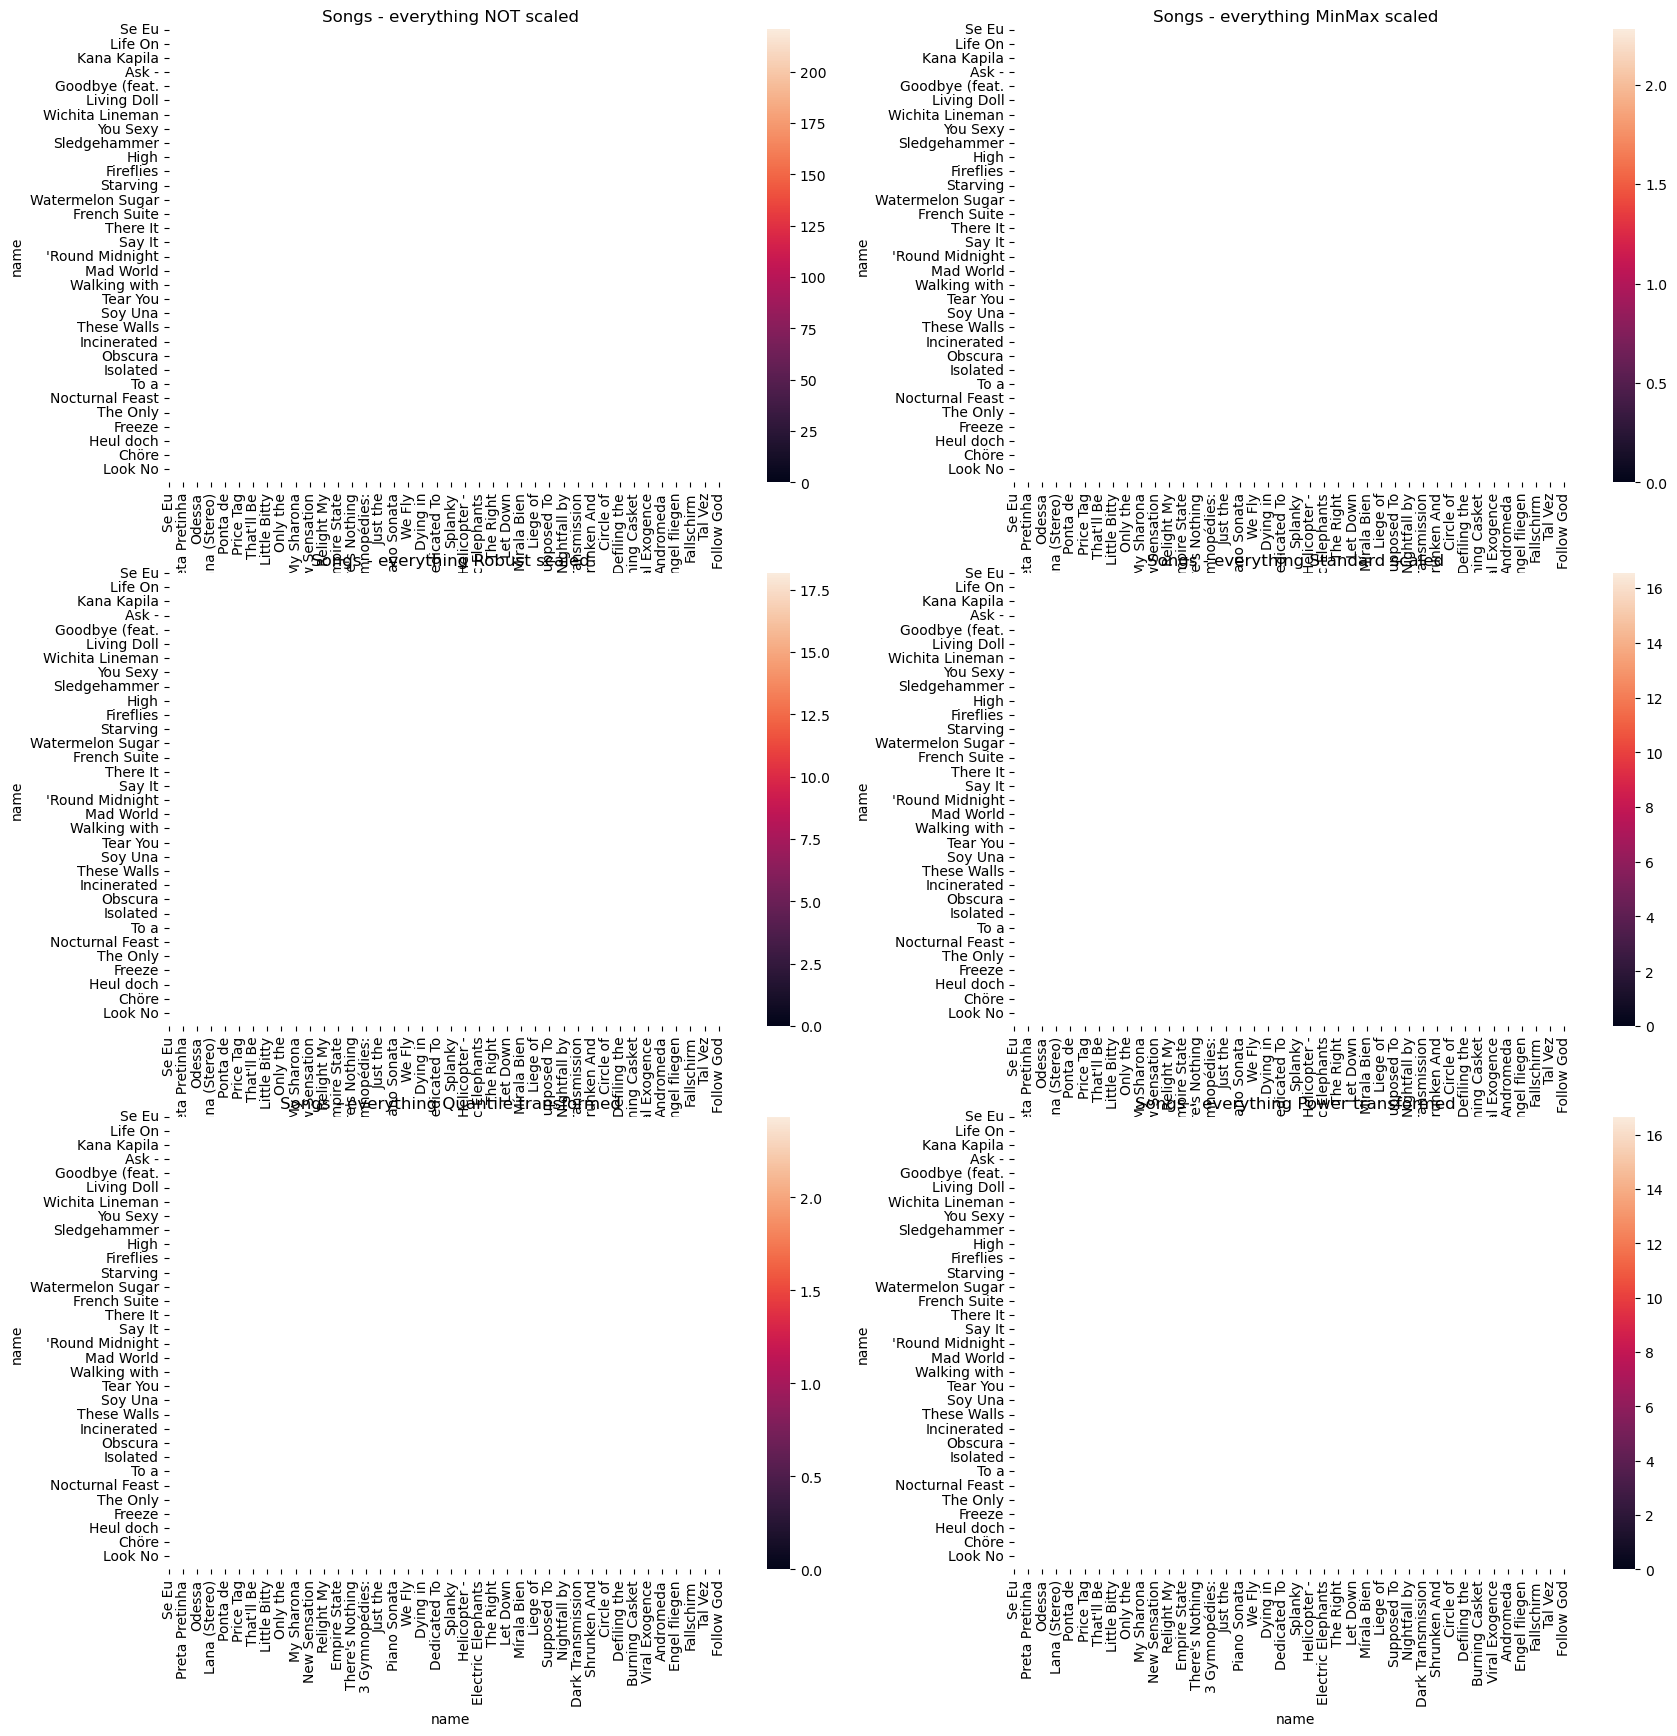

In [45]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20))

sns.heatmap(songs_not_scaled_distances, ax=ax[0, 0], linewidths=.2);
sns.heatmap(songs_scaled_minmax_distances, ax=ax[0, 1], linewidths=.2);
sns.heatmap(songs_scaled_robust_distances, ax=ax[1, 0], linewidths=.2);
sns.heatmap(songs_scaled_standard_distances, ax=ax[1, 1], linewidths=.2);
sns.heatmap(songs_scaled_quantile_distances, ax=ax[2, 0], linewidths=.2);
sns.heatmap(songs_scaled_power_distances, ax=ax[2, 1], linewidths=.2);

ax[0, 0].set_title('Songs - everything NOT scaled')
ax[0, 1].set_title('Songs - everything MinMax scaled')
ax[1, 0].set_title('Songs - everything Robust scaled')
ax[1, 1].set_title('Songs - everything Standard scaled')
ax[2, 0].set_title('Songs - everything Quantile transformed')
ax[2, 1].set_title('Songs - everything Power transformed')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(3, 2, figsize=(20, 20))

# Plotting the heatmaps
sns.heatmap(songs_not_scaled_distances, ax=ax[0, 0], linewidths=.2)
sns.heatmap(songs_scaled_minmax_distances, ax=ax[0, 1], linewidths=.2)
sns.heatmap(songs_scaled_robust_distances, ax=ax[1, 0], linewidths=.2)
sns.heatmap(songs_scaled_standard_distances, ax=ax[1, 1], linewidths=.2)
sns.heatmap(songs_scaled_quantile_distances, ax=ax[2, 0], linewidths=.2)
sns.heatmap(songs_scaled_power_distances, ax=ax[2, 1], linewidths=.2)

# Setting the titles
ax[0, 0].set_title('Songs - everything NOT scaled')
ax[0, 1].set_title('Songs - everything MinMax scaled')
ax[1, 0].set_title('Songs - everything Robust scaled')
ax[1, 1].set_title('Songs - everything Standard scaled')
ax[2, 0].set_title('Songs - everything Quantile transformed')
ax[2, 1].set_title('Songs - everything Power transformed')

# Rotating x-axis tick labels
for axes in ax:
    for axis in axes:
        axis.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
# K-Means

In [70]:
# 1. import the model
from sklearn.cluster import KMeans

# 2. initialize the model
my_kmeans = KMeans(n_clusters= 41)

# 3. fit the model to the data
my_kmeans.fit(df_songs_scaled_minmax) # pass your scaled data here

# 4. obtain the cluster output
clusters = my_kmeans.labels_

# 5. attach the cluster output to our original DataFrame
df_songs_scaled_minmax["cluster"] = clusters

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [62]:
df_songs_scaled_minmax

danceability   energy  loudness  speechiness  acousticness  \
name                                                                           
Se Eu                 0.680455  0.25900  0.763897     0.076797      0.696787   
Saudade De            0.767322  0.39900  0.771967     0.037691      0.217871   
Canta Canta,          0.880041  0.73000  0.798018     0.377996      0.454819   
Mulher Eu             0.729059  0.05020  0.682811     0.051307      0.882530   
Rosa Morena           0.673216  0.11900  0.655228     0.041394      0.919679   
...                        ...      ...       ...          ...           ...   
1812 Festival         0.208893  0.06940  0.596818     0.051525      0.920683   
Winter Fragments      0.194416  0.10100  0.621548     0.048148      0.858434   
Schoenberg: 5         0.061634  0.00093  0.277803     0.047277      0.954819   
Serenade For          0.137539  0.02080  0.498142     0.045643      0.886546   
Ravel: Boléro,        0.366081  0.04870  0.577614     0.035185      0.786145   

                  instrumentalness  liveness   valence     tempo  cluster  
name                                                                       
Se Eu                     0.000060  0.987842  0.310660  0.515800       35  
Saudade De                0.000002  0.108409  0.703553  0.584322       19  
Canta Canta,              0.000064  0.125633  0.918782  0.437862        9  
Mulher Eu                 0.000041  0.391084  0.531980  0.499098       22  
Rosa Morena               0.000348  0.105370  0.408122  0.565171        3  
...                            ...       ...       ...       ...      ...  
1812 Festival             0.725888  0.084296  0.066497  0.410795       38  
Winter Fragments          0.432487  0.070314  0.036041  0.388495       23  
Schoenberg: 5             0.983756  0.078217  0.034924  0.334469       16  
Serenade For              0.512690  0.112462  0.060000  0.313608       38  
Ravel: Boléro,            0.491371  0.287741  0.256853  0.299640       38  

[5235 rows x 10 columns]

In [64]:
cluster_30_rows = df_songs_scaled_minmax[df_songs_scaled_minmax['cluster'] == 30]
cluster_30_rows

danceability  energy  loudness  speechiness  acousticness  \
name                                                                            
Nova Bossa              0.618407   0.739  0.805288     0.049237      0.525100   
Manada                  0.673216   0.485  0.790812     0.043573      0.116466   
Baião Destemperado      0.889349   0.741  0.842734     0.172113      0.426707   
Pobre e                 0.803516   0.892  0.866437     0.102397      0.008835   
Plants                  0.452947   0.974  0.887663     0.056863      0.000003   
...                          ...     ...       ...          ...           ...   
Walk This               0.691830   0.851  0.895390     0.051525      0.010643   
Casino Royale           0.569804   0.963  0.888021     0.050763      0.006657   
Chopper -               0.740434   0.976  0.862492     0.095643      0.036044   
Garden -                0.754912   0.349  0.834061     0.142702      0.047992   
Valley of               0.673216   0.770  0.810896     0.063181      0.045582   

                    instrumentalness  liveness   valence     tempo  cluster  
name                                                                         
Nova Bossa                  0.736041  0.147923  0.894416  0.444030       30  
Manada                      0.707614  0.088450  0.747208  0.508720       30  
Baião Destemperado          0.639594  0.218845  0.755330  0.447287       30  
Pobre e                     0.572589  0.303951  0.730964  0.602631       30  
Plants                      0.756345  0.370821  0.726904  0.747292       30  
...                              ...       ...       ...       ...      ...  
Walk This                   0.875127  0.312057  0.959391  0.763536       30  
Casino Royale               0.937056  0.090274  0.852792  0.804005       30  
Chopper -                   0.888325  0.169200  0.977665  0.793593       30  
Garden -                    0.911675  0.125633  0.764467  0.813262       30  
Valley of                   0.882234  0.444782  0.527919  0.746867       30  

[61 rows x 10 columns]

In [56]:
df_songs_scaled_minmax.groupby(by='cluster').mean()

danceability    energy  loudness  speechiness  acousticness  \
cluster                                                                
0            0.295033  0.858286  0.821342     0.084413      0.004373   
1            0.544588  0.684301  0.874577     0.100256      0.078287   
2            0.466089  0.141510  0.660783     0.051618      0.963469   
3            0.527284  0.201869  0.748642     0.049430      0.881336   
4            0.267276  0.957798  0.870534     0.153143      0.004239   
5            0.762834  0.810038  0.887112     0.089647      0.114732   
6            0.634572  0.462398  0.820218     0.061960      0.673733   
7            0.666764  0.742159  0.882903     0.081767      0.341534   
8            0.560621  0.566376  0.857570     0.056586      0.109147   
9            0.805979  0.769734  0.882398     0.122945      0.376701   
10           0.199964  0.926022  0.844524     0.118967      0.002162   
11           0.271420  0.118515  0.610104     0.048041      0.946542   
12           0.278116  0.912000  0.850806     0.124569      0.004714   
13           0.498372  0.868564  0.893593     0.083130      0.042840   
14           0.680817  0.577679  0.831073     0.071548      0.686952   
15           0.576177  0.391012  0.752813     0.063832      0.572032   
16           0.305126  0.030321  0.488036     0.051185      0.986486   
17           0.784081  0.685508  0.876483     0.077246      0.063772   
18           0.458826  0.877521  0.885456     0.111205      0.038026   
19           0.642990  0.525307  0.805834     0.052163      0.257529   
20           0.510108  0.827758  0.862580     0.066426      0.052029   
21           0.659419  0.800671  0.885837     0.137509      0.178526   
22           0.628538  0.283524  0.753071     0.060933      0.835190   
23           0.261418  0.132549  0.665438     0.047154      0.926948   
24           0.670764  0.855043  0.890566     0.081337      0.028367   
25           0.850830  0.588395  0.847700     0.091045      0.094711   
26           0.288920  0.906520  0.842251     0.105229      0.016338   
27           0.562867  0.728866  0.858532     0.102350      0.577542   
28           0.674200  0.427548  0.817368     0.060565      0.329215   
29           0.331737  0.895887  0.868001     0.101824      0.010270   
30           0.652991  0.800016  0.861960     0.065393      0.095464   
31           0.747945  0.833552  0.891053     0.077382      0.070483   
32           0.237802  0.929022  0.844872     0.136556      0.006768   
33           0.605173  0.851817  0.901603     0.089211      0.037455   
34           0.655169  0.845128  0.898702     0.078214      0.049158   
35           0.524330  0.356654  0.760460     0.078308      0.767258   
36           0.405022  0.504419  0.841370     0.049208      0.573412   
37           0.696948  0.754041  0.880054     0.187774      0.130451   
38           0.179168  0.147642  0.646689     0.044323      0.915976   
39           0.802654  0.633872  0.869102     0.350441      0.139963   
40           0.599966  0.329336  0.735392     0.060249      0.873076   

         instrumentalness  liveness   valence     tempo  
cluster                                                  
0                0.851301  0.166239  0.390103  0.527631  
1                0.006434  0.139053  0.460318  0.723081  
2                0.889208  0.124642  0.231306  0.513147  
3                0.035558  0.135496  0.308418  0.509227  
4                0.070259  0.180065  0.132706  0.575955  
5                0.004748  0.373535  0.798295  0.550968  
6                0.030409  0.134004  0.482890  0.518315  
7                0.010763  0.155855  0.501559  0.499139  
8                0.017043  0.148896  0.210124  0.555570  
9                0.005573  0.141582  0.837593  0.479802  
10               0.856223  0.160855  0.202840  0.757215  
11               0.884435  0.139077  0.130514  0.706287  
12               0.462811  0.203115  0.192418  0.560853  
13               0.020598  0.169586  0.699

In [57]:
centroids = my_kmeans.cluster_centers_
pd.DataFrame(centroids)

0         1         2         3         4         5         6  \
0   0.295033  0.858286  0.821342  0.084413  0.004373  0.851301  0.166239   
1   0.544588  0.684301  0.874577  0.100256  0.078287  0.006434  0.139053   
2   0.466089  0.141510  0.660783  0.051618  0.963469  0.889208  0.124642   
3   0.527284  0.201869  0.748642  0.049430  0.881336  0.035558  0.135496   
4   0.267276  0.957798  0.870534  0.153143  0.004239  0.070259  0.180065   
5   0.762834  0.810038  0.887112  0.089647  0.114732  0.004748  0.373535   
6   0.634572  0.462398  0.820218  0.061960  0.673733  0.030409  0.134004   
7   0.666764  0.742159  0.882903  0.081767  0.341534  0.010763  0.155855   
8   0.560621  0.566376  0.857570  0.056586  0.109147  0.017043  0.148896   
9   0.805979  0.769734  0.882398  0.122945  0.376701  0.005573  0.141582   
10  0.199964  0.926022  0.844524  0.118967  0.002162  0.856223  0.160855   
11  0.271420  0.118515  0.610104  0.048041  0.946542  0.884435  0.139077   
12  0.278116  0.912000  0.850806  0.124569  0.004714  0.462811  0.203115   
13  0.498372  0.868564  0.893593  0.083130  0.042840  0.020598  0.169586   
14  0.680817  0.577679  0.831073  0.071548  0.686952  0.014654  0.204011   
15  0.576177  0.391012  0.752813  0.063832  0.572032  0.795066  0.134709   
16  0.305126  0.030321  0.488036  0.051185  0.986486  0.914065  0.099996   
17  0.784081  0.685508  0.876483  0.077246  0.063772  0.009864  0.128303   
18  0.458826  0.877521  0.885456  0.111205  0.038026  0.038267  0.621962   
19  0.642990  0.525307  0.805834  0.052163  0.257529  0.010281  0.144871   
20  0.510108  0.827758  0.862580  0.066426  0.052029  0.439365  0.189929   
21  0.659419  0.800671  0.885837  0.137509  0.178526  0.003492  0.716953   
22  0.628538  0.283524  0.753071  0.060933  0.835190  0.052223  0.137685   
23  0.261418  0.132549  0.665438  0.047154  0.926948  0.060060  0.175586   
24  0.670764  0.855043  0.890566  0.081337  0.028367  0.813996  0.179446   
25  0.850830  0.588395  0.847700  0.091045  0.094711  0.011334  0.095226   
26  0.288920  0.906520  0.842251  0.105229  0.016338  0.856169  0.451616   
27  0.562867  0.728866  0.858532  0.102350  0.577542  0.026547  0.168232   
28  0.674200  0.427548  0.817368  0.060565  0.329215  0.019492  0.137258   
29  0.331737  0.895887  0.868001  0.101824  0.010270  0.056313  0.175436   
30  0.652991  0.800016  0.861960  0.065393  0.095464  0.756012  0.227379   
31  0.747945  0.833552  0.891053  0.077382  0.070483  0.013797  0.103120   
32  0.237802  0.929022  0.844872  0.136556  0.006768  0.856441  0.162597   
33  0.605173  0.851817  0.901603  0.089211  0.037455  0.026836  0.159276   
34  0.655169  0.845128  0.898702  0.078214  0.049158  0.014723  0.247915   
35  0.524330  0.356654  0.760460  0.078308  0.767258  0.041974  0.761357   
36  0.405022  0.504419  0.841370  0.049208  0.573412  0.011293  0.192804   
37  0.696948  0.754041  0.880054  0.187774  0.130451  0.000645  0.150168   
38  0.179168  0.147642  0.646689  0.044323  0.915976  0.857812  0.151807   
39  0.802654  0.633872  0.869102  0.350441  0.139963  0.003400  0.165161   
40  0.599966  0.329336  0.735392  0.060249  0.873076  0.808319  0.209994   

           7         8  
0   0.390103  0.527631  
1   0.460318  0.723081  
2   0.231306  0.513147  
3   0.308418  0.509227  
4   0.132706  0.575955  
5   0.798295  0.550968  
6   0.482890  0.518315  
7   0.501559  0.499139  
8   0.210124  0.555570  
9   0.837593  0.479802  
10  0.202840  0.757215  
11  0.130514  0.706287  
12  0.192418  0.560853  
13  0.699043  0.644227  
14  0.848901  0.512581  
15  0.282555  0.560163  
16  0.116007  0.350859  
17  0.545327  0.511853  
18  0.272885  0.613334  
19  0.823007  0.525594  
20  0.520468  0.611815  
21  0.642203  0.549068  
22  0.649602  0.542140  
23  0.117877  0.480913  
24  0.277210  0.608561  
25  0.856239  0.524475  
26  0.235022  0.565251  
27  0.806797  0.782011  
28  0.484373  0.508236  
29  0.364154  0.502259  
30  0.808854  0.640960  
31  0.822440  0.53

In [79]:
inertia_list = []
seed=234
min_k = 2
max_k = 200

for i in range(min_k,max_k):
    myKMeans = KMeans(n_clusters=i,
                      n_init="auto",
                      random_state = seed)
    myKMeans.fit(df_songs_scaled_minmax)
    inertia_list.append(myKMeans.inertia_)

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


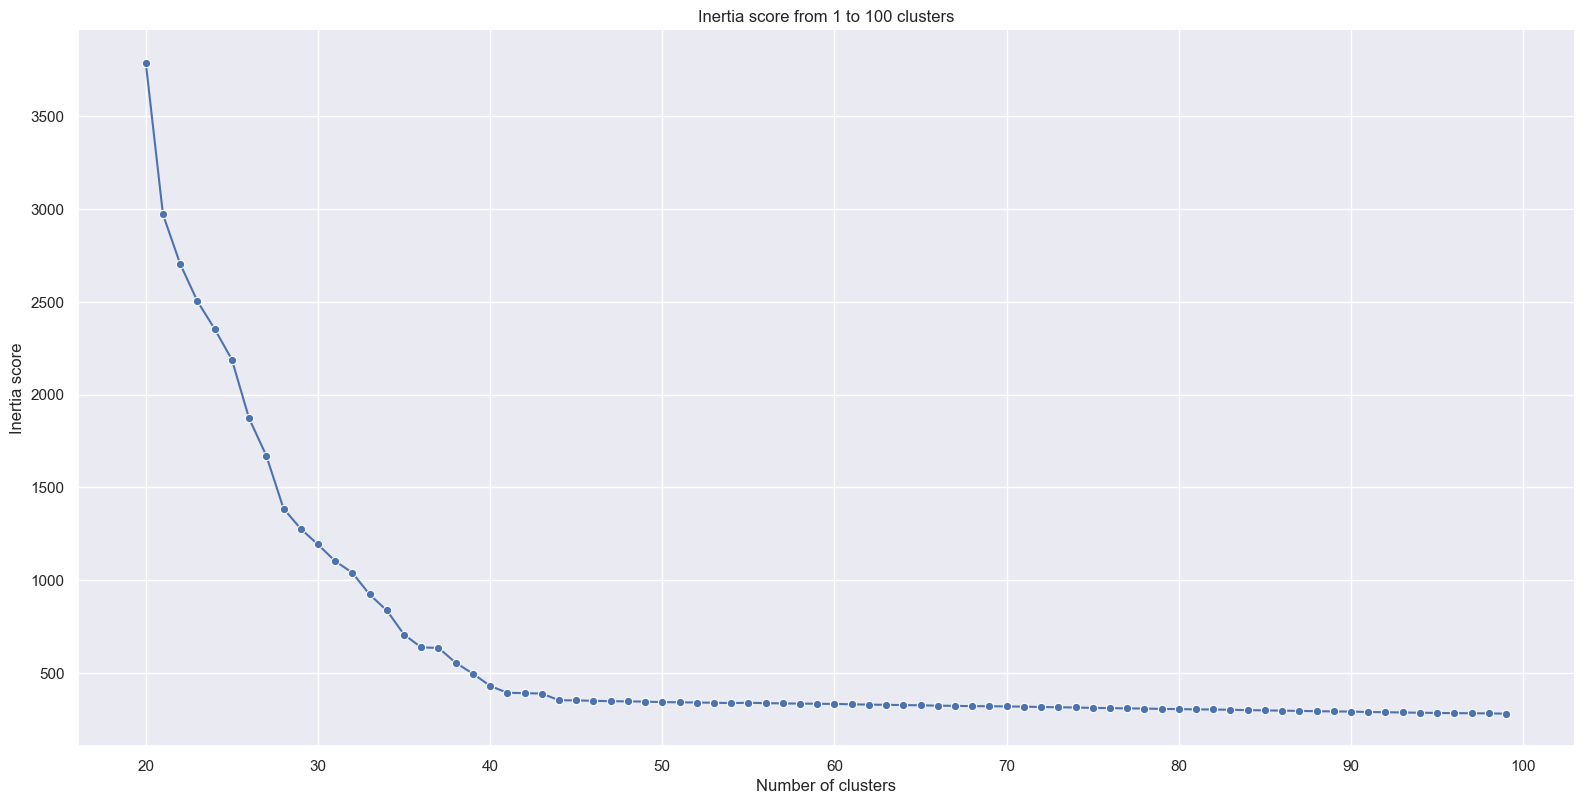

In [80]:
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(min_k,max_k),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 1 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);

In [77]:
seed=234
min_k = 20
max_k = 100

# Create an empty list to store the silhouette scores
sil_scores = []


for j in range(min_k, max_k):

    # Create a KMeans object with the specified number of clusters
    kmeans = KMeans(n_clusters=j,
                    n_init="auto",
                    random_state = seed)

    # Fit the KMeans model to the scaled data
    kmeans.fit(df_songs_scaled_minmax)

    # Get the cluster labels
    labels = kmeans.labels_

    # Calculate the silhouette score
    score = silhouette_score(df_songs_scaled_minmax, labels)

    # Append the silhouette score to the list
    sil_scores.append(score)
    

In [73]:
df_songs_scaled_minmax

danceability   energy  loudness  speechiness  acousticness  \
name                                                                           
Se Eu                 0.680455  0.25900  0.763897     0.076797      0.696787   
Saudade De            0.767322  0.39900  0.771967     0.037691      0.217871   
Canta Canta,          0.880041  0.73000  0.798018     0.377996      0.454819   
Mulher Eu             0.729059  0.05020  0.682811     0.051307      0.882530   
Rosa Morena           0.673216  0.11900  0.655228     0.041394      0.919679   
...                        ...      ...       ...          ...           ...   
1812 Festival         0.208893  0.06940  0.596818     0.051525      0.920683   
Winter Fragments      0.194416  0.10100  0.621548     0.048148      0.858434   
Schoenberg: 5         0.061634  0.00093  0.277803     0.047277      0.954819   
Serenade For          0.137539  0.02080  0.498142     0.045643      0.886546   
Ravel: Boléro,        0.366081  0.04870  0.577614     0.035185      0.786145   

                  instrumentalness  liveness   valence     tempo  cluster  
name                                                                       
Se Eu                     0.000060  0.987842  0.310660  0.515800       39  
Saudade De                0.000002  0.108409  0.703553  0.584322       26  
Canta Canta,              0.000064  0.125633  0.918782  0.437862       18  
Mulher Eu                 0.000041  0.391084  0.531980  0.499098       31  
Rosa Morena               0.000348  0.105370  0.408122  0.565171       17  
...                            ...       ...       ...       ...      ...  
1812 Festival             0.725888  0.084296  0.066497  0.410795        6  
Winter Fragments          0.432487  0.070314  0.036041  0.388495       21  
Schoenberg: 5             0.983756  0.078217  0.034924  0.334469       34  
Serenade For              0.512690  0.112462  0.060000  0.313608        6  
Ravel: Boléro,            0.491371  0.287741  0.256853  0.299640        6  

[5235 rows x 10 columns]

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


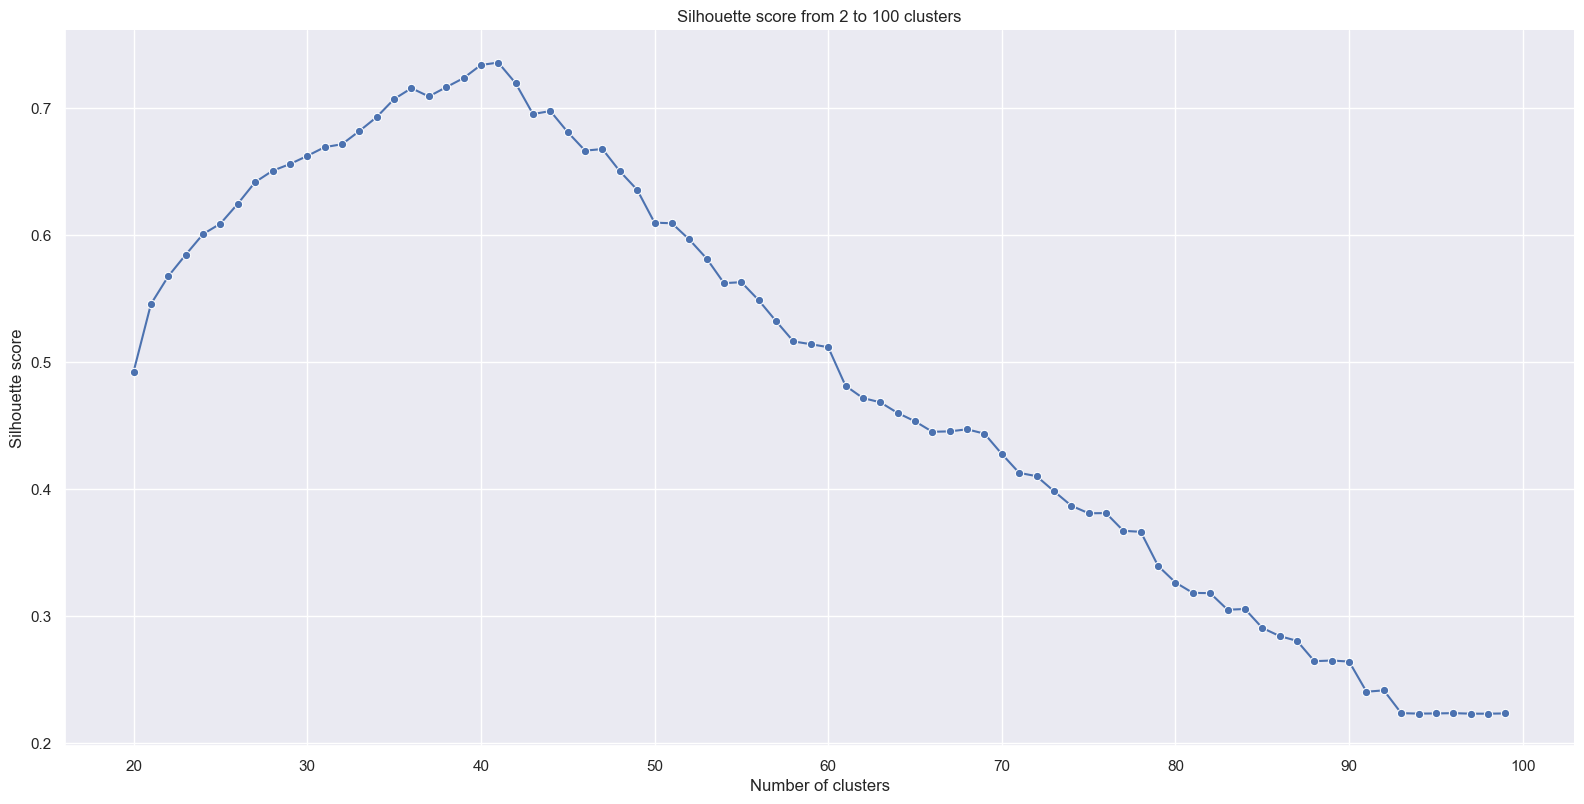

In [78]:
sns.set_theme(style='darkgrid')

(
sns.relplot(y=sil_scores,
            x=range(min_k,max_k),
            kind='line',
            marker='o',
            height = 8,
            aspect=2)
.set(title=f"Silhouette score from 2 to {max_k} clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
);